In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-csv/House Price.csv


In [2]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [4]:
# Load the dataset
df = pd.read_csv('/kaggle/input/house-prices-csv/House Price.csv')
# Data Exploration
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2   

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


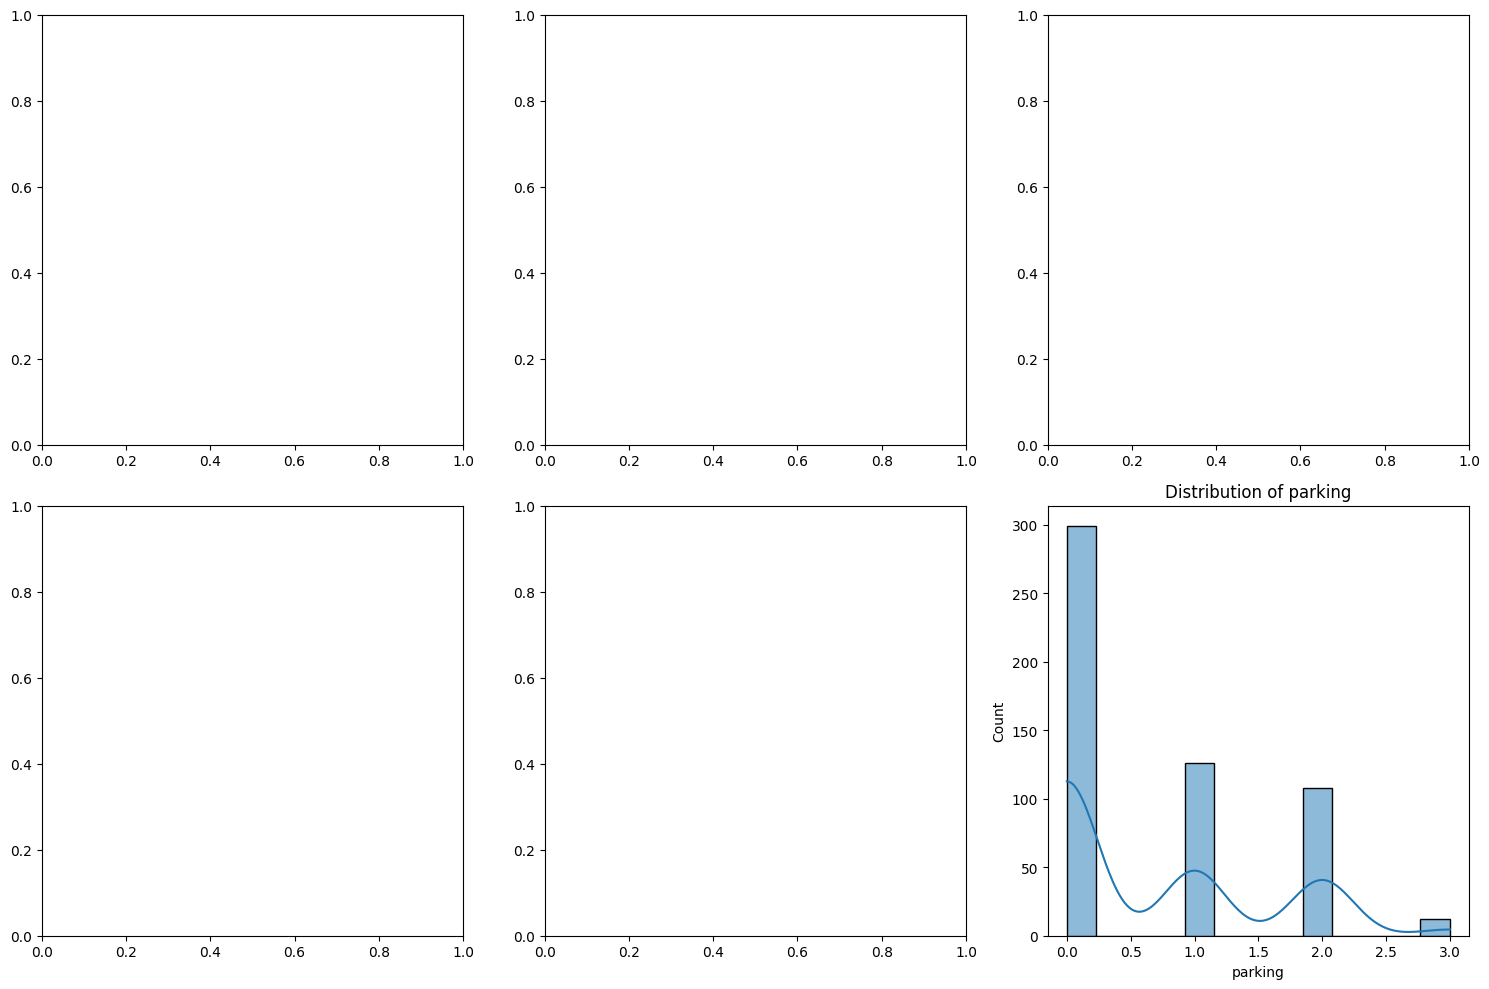

In [5]:
# Data Visualization
plt.figure(figsize=(15, 10))

# Numerical features
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i, feature in enumerate(numerical_features, 1):
 plt.subplot(2, 3, i)
sns.histplot(df[feature], kde=True)
plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()
                        

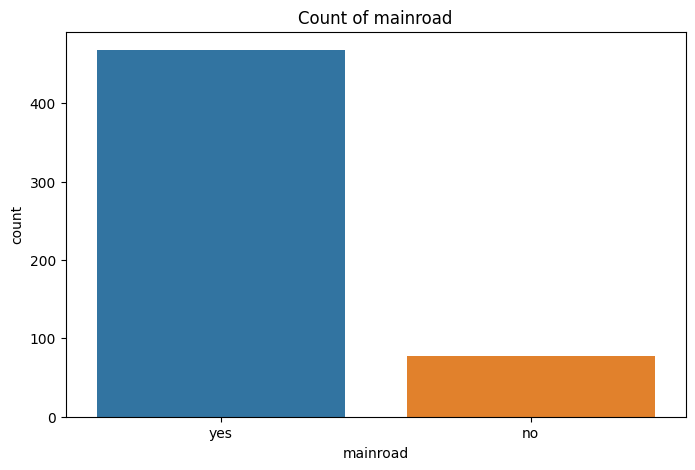

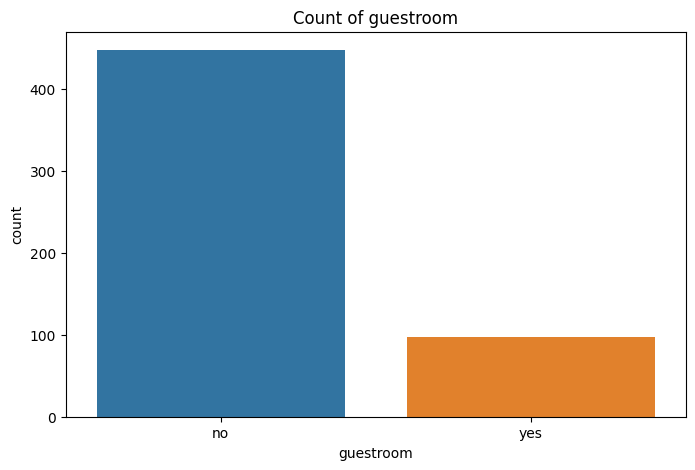

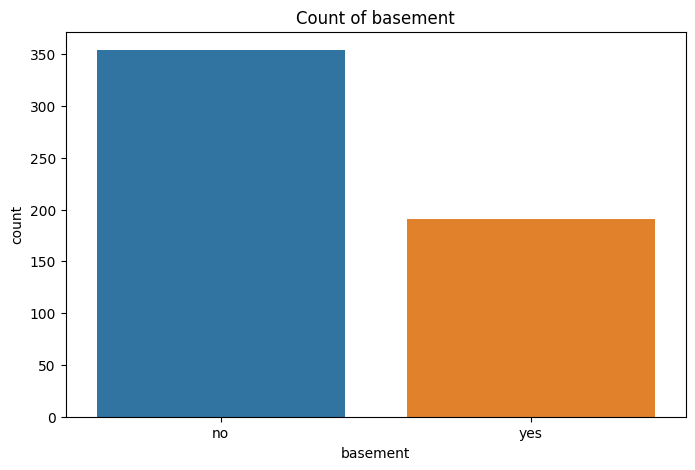

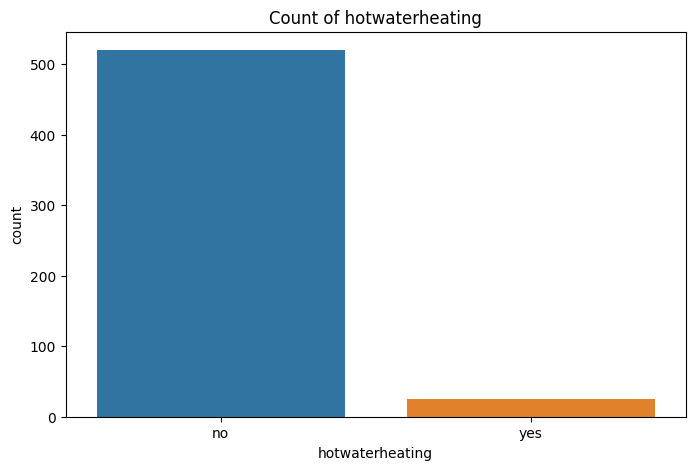

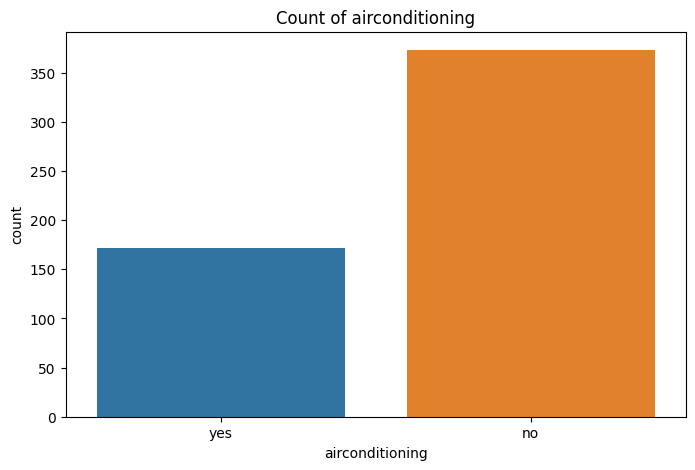

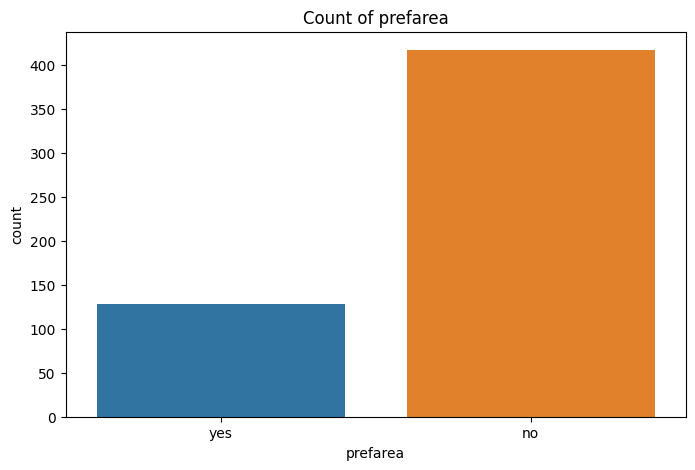

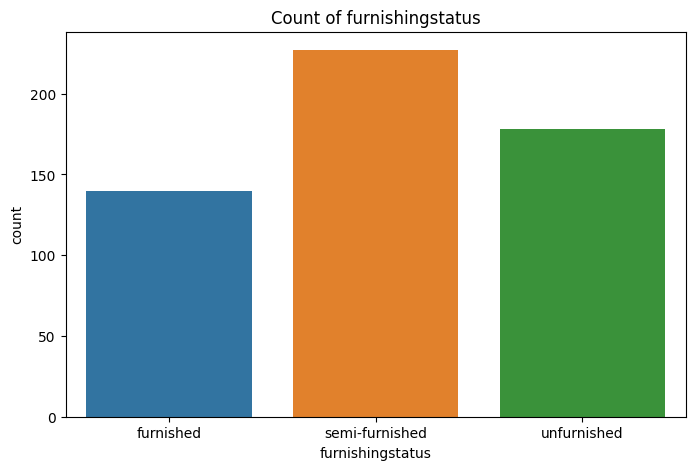

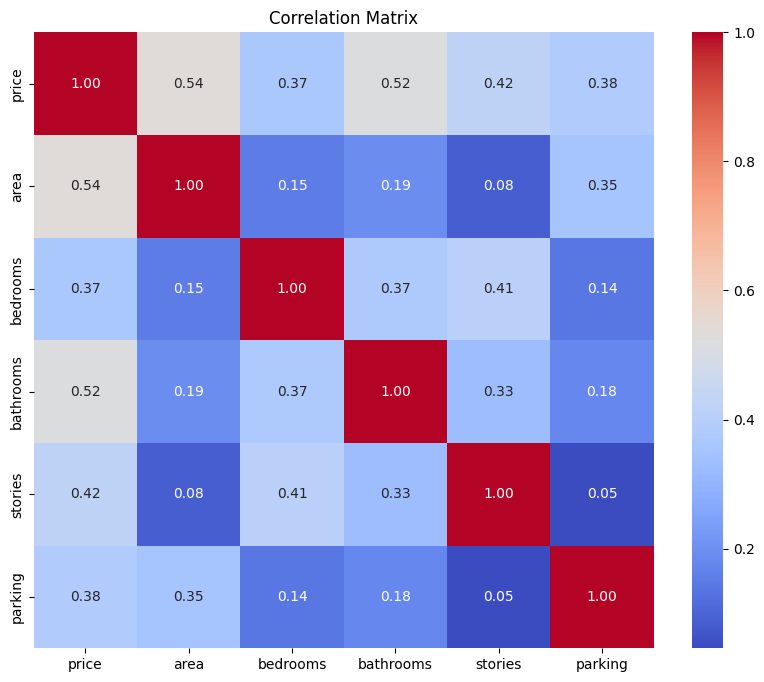


Linear Regression Performance:
Mean Squared Error: 1771751116594.0344
R-squared: 0.6494754192267804

Random Forest Performance:
Mean Squared Error: 1963538216518.6526
R-squared: 0.6115321143409216


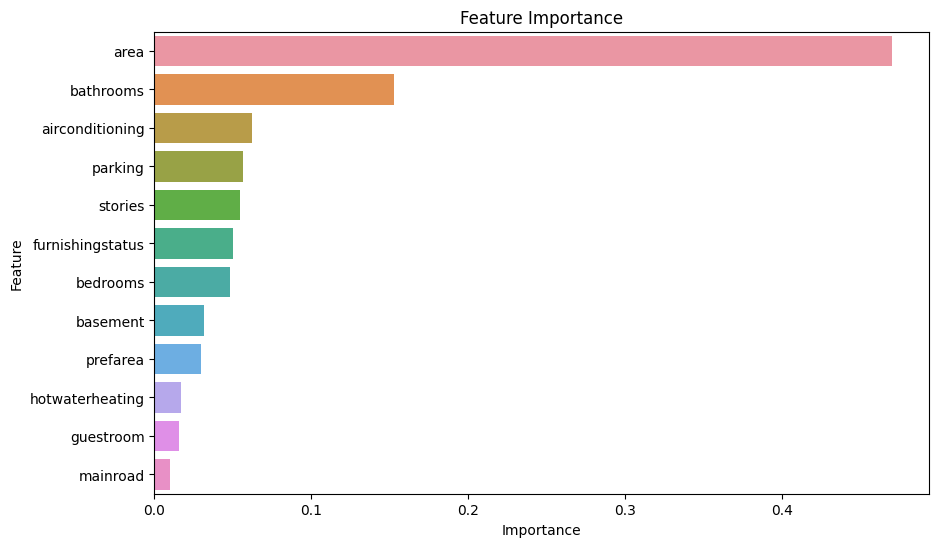


Predicted Price for Sample House: 8,929,048.80


In [6]:

# Categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing
# Convert yes/no to 1/0
binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea']
for feature in binary_features:
    df[feature] = df[feature].map({'yes': 1, 'no': 0})

# Encode furnishingstatus
le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

# Split data into features and target
X = df.drop('price', axis=1)
y = df['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Evaluation - Linear Regression
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Performance:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R-squared: {lr_r2}")

# Model Training - Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation - Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

# Prediction Example
sample_house = pd.DataFrame({
    'area': [7500],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [1],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [2],
    'prefarea': [1],
    'furnishingstatus': [1]  # 1 for semi-furnished (check your label encoding)
})

predicted_price = rf_model.predict(sample_house)
print(f"\nPredicted Price for Sample House: {predicted_price[0]:,.2f}")
